In [218]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
NFLX_df = pd.read_csv('NFLX.csv')
NFLX_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [220]:
# Check for null values in each column before filling
null_values = NFLX_df.isnull().sum()
print("Null values in each column before filling:")
print(null_values)

# Exclude non-numeric columns (like 'Date') when filling null values with the mean
NFLX_df_numeric = NFLX_df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns

# Replace null values in numeric columns with the mean
NFLX_df[NFLX_df_numeric.columns] = NFLX_df_numeric.fillna(NFLX_df_numeric.mean())

# Verify if null values are filled
null_values_after = NFLX_df.isnull().sum()
print("\nNull values in each column after filling:")
print(null_values_after)

Null values in each column before filling:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Null values in each column after filling:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


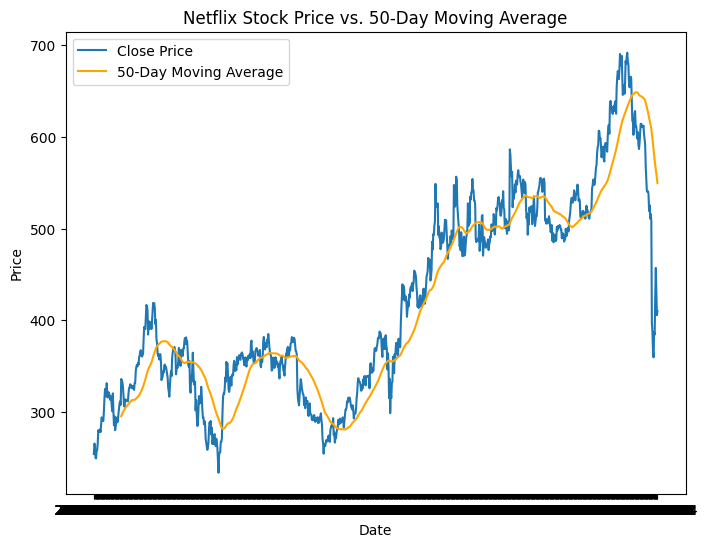

In [221]:
# Calculate the 50-day moving average
moving_avg_50 = NFLX_df['Close'].rolling(window=50).mean()

# Plot the original Close prices and the 50-day moving average
plt.figure(figsize=(8, 6))
plt.plot(NFLX_df['Date'], NFLX_df['Close'], label='Close Price')
plt.plot(NFLX_df['Date'], moving_avg_50, label='50-Day Moving Average', color='orange')
plt.title('Netflix Stock Price vs. 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

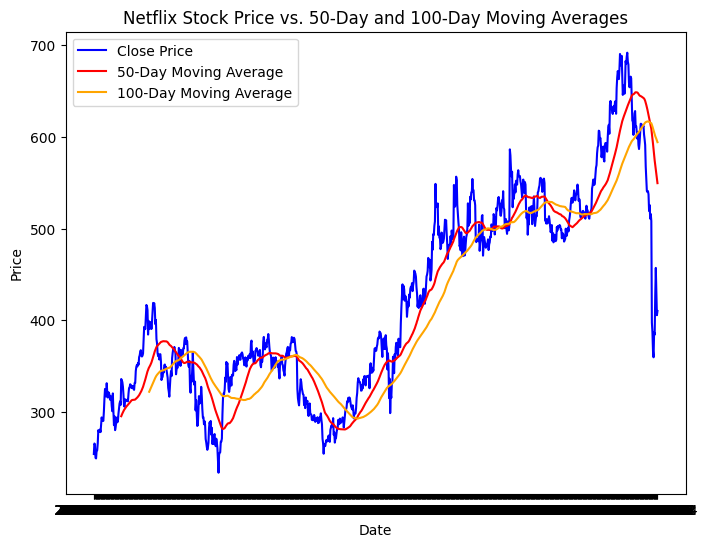

In [222]:
# Calculate the 50-day and 100-day moving averages
moving_avg_50 = NFLX_df['Close'].rolling(window=50).mean()
moving_avg_100 = NFLX_df['Close'].rolling(window=100).mean()

# Plot the original Close prices, 50-day moving average, and 100-day moving average
plt.figure(figsize=(8, 6))
plt.plot(NFLX_df['Date'], NFLX_df['Close'], label='Close Price', color='blue')
plt.plot(NFLX_df['Date'], moving_avg_50, label='50-Day Moving Average', color='red')
plt.plot(NFLX_df['Date'], moving_avg_100, label='100-Day Moving Average', color='orange')
plt.title('Netflix Stock Price vs. 50-Day and 100-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [223]:
close_data = NFLX_df[['Close']]

# Split the dataset into 80% training and 20% testing
train_data, test_data = train_test_split(close_data, test_size=0.2, shuffle=False)


In [224]:
# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test data
train_data= scaler.fit_transform(train_data)
test_data= scaler.transform(test_data)


In [225]:
# Convert scaled data back to DataFrame for ease of use
train_data = pd.DataFrame(train_data, columns=['Close'])
test_data = pd.DataFrame(test_data, columns=['Close'])

# Check the scaled data
print(train_data.head())
test_data

      Close
0  0.057822
1  0.090336
2  0.087045
3  0.046019
4  0.044232


,Close
0,0.780287
1,0.779947
2,0.770782
3,0.784259
4,0.770782
...,...
197,0.548318
198,0.633405
199,0.554957
200,0.487204


In [226]:
# Prepare lists for sequences
x = []
y = []

# Create sequences
for i in range(50, train_data.shape[0]):
    x.append(train_data.iloc[i-50:i].values)
    y.append(train_data.iloc[i, 0])  # Assuming the target is in the first column

# Convert lists to numpy arrays
x = np.array(x)
y = np.array(y)


In [227]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()

model.add(Input(shape=(x.shape[1], x.shape[2])))

model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=False))
model.add(Dropout(0.4))

# Add a Dense layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Print model summary
model.summary()


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_55 (LSTM)                       │ (None, 50, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_55 (Dropout)                 │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_56 (LSTM)                       │ (None, 50, 60)              │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_56 (Dropout)                 │ (None, 50, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_57 (LSTM)                       │ (None, 80)                  │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_57 (Dropout)                 │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              81 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,241 (321.25 KB)

 Trainable params: 82,241 (321.25 KB)

 Non-trainable params: 0 (0.00 B)

In [228]:
# Train the model
history = model.fit(x, y,
                    epochs=20,              # Number of epochs to train
                    batch_size=32,          # Batch size
                    validation_split=0.2,   # Fraction of data to reserve for validation
                    verbose=1)              # Verbosity mode: 1 for progress bar, 0 for silent

# Print the training history
print(history.history)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - loss: 0.1179 - val_loss: 0.1016
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - loss: 0.0184 - val_loss: 0.0130
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0125 - val_loss: 0.0099
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0101 - val_loss: 0.0065
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0094 - val_loss: 0.0116
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0094 - val_loss: 0.0066
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0082 - val_loss: 0.0127
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - loss: 0.0078 - val_loss: 0.0075
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 0.0076 - val_loss: 0.0087
Epoch 10/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0089 - val_loss: 0.0098
Epoch 11/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0078 - val_loss: 0.0051
Epoch 12/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss

In [229]:
past_50_days = train_data.tail(50)
# Ensure past_50_days and test_data are both DataFrames
past_50_days = pd.DataFrame(past_50_days, columns=['Close'])
test_data = pd.DataFrame(test_data, columns=['Close'])

# Concatenate past_50_days with test_data
test_data = pd.concat([past_50_days, test_data], ignore_index=True)



In [230]:
test_data

,Close
0,0.890995
1,0.922629
2,0.935454
3,0.918430
4,0.915395
...,...
247,0.548318
248,0.633405
249,0.554957
250,0.487204


In [231]:
# Prepare lists for sequences
x = []
y = []

# Create sequences
for i in range(50, test_data.shape[0]):
    x.append(test_data.iloc[i-50:i].values)
    y.append(test_data.iloc[i, 0])  # Assuming the target is in the first column

# Convert lists to numpy arrays
x = np.array(x)
y = np.array(y)


In [232]:
# Make predictions
y_predict= model.predict(x)

# Inverse transform predictions to original scale
y_predict= scaler.inverse_transform(y_predict)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step


In [233]:
y

array([0.78028704, 0.77994659, 0.7707824 , 0.78425911, 0.7707824 ,
       0.77353449, 0.78057078, 0.79325299, 0.78088283, 0.76405825,
       0.74391411, 0.7537592 , 0.76593081, 0.71727283, 0.7410769 ,
       0.71242124, 0.71718772, 0.73622531, 0.72365653, 0.71610957,
       0.72013843, 0.75977413, 0.74904952, 0.76326384, 0.75883781,
       0.76173172, 0.76598753, 0.7630085 , 0.75242571, 0.75287967,
       0.72504673, 0.74011226, 0.73988533, 0.73344491, 0.71477608,
       0.71891837, 0.72317417, 0.75472392, 0.73205462, 0.73350163,
       0.75032621, 0.75722058, 0.74652437, 0.78006011, 0.79118189,
       0.80627582, 0.83183903, 0.84874881, 0.85008221, 0.83507348,
       0.85019564, 0.85144401, 0.87317707, 0.85706179, 0.84230831,
       0.85711841, 0.86089194, 0.8704533 , 0.8910798 , 0.8768938 ,
       0.84103153, 0.84662091, 0.84313103, 0.79370704, 0.7884298 ,
       0.79875717, 0.80182139, 0.80868737, 0.80979392, 0.79546609,
       0.80488562, 0.79801964, 0.78573451, 0.80426134, 0.82565

In [234]:
y_actual= scaler.inverse_transform(y.reshape(-1,1))

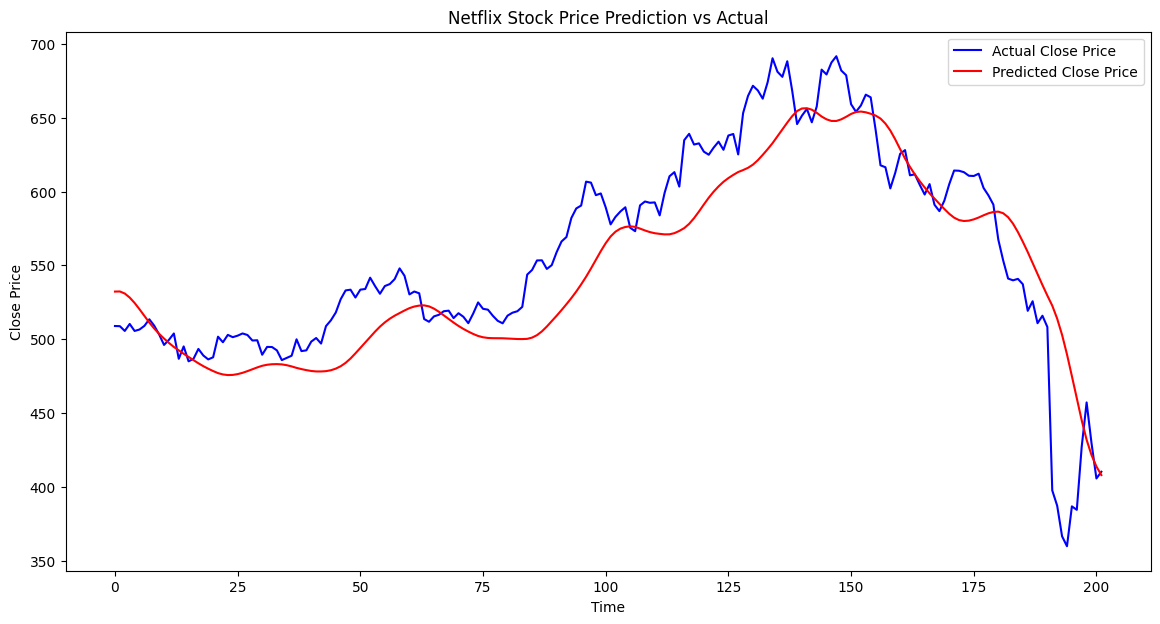

Mean Squared Error: 1145.9057130941555
Mean Absolute Error: 25.519635953241014


In [235]:


# Plot predictions vs actual values
plt.figure(figsize=(14, 7))

# Plot actual values
plt.plot(y_actual, color='blue', label='Actual Close Price')

# Plot predicted values
plt.plot(y_predict, color='red', label='Predicted Close Price')

# Add titles and labels
plt.title('Netflix Stock Price Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()

# Show the plot
plt.show()

# Calculate and print metrics
mse = mean_squared_error(y_actual, y_predict)
mae = mean_absolute_error(y_actual, y_predict)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


In [236]:
model.save('Stock Predictions Model.keras')